# Week 07

Supervised Learning: Classification

## Setup

Run the following 2 cells to import all necessary libraries and helpers for this week's exercises

In [ ]:
!wget -q https://github.com/PSAM-5020-2025S-A/5020-utils/raw/main/src/data_utils.py

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import OrdinalEncoder

from data_utils import StandardScaler
from data_utils import LinearRegression
from data_utils import SGDClassifier, RandomForestClassifier, SVC, LogisticRegression
from data_utils import display_confusion_matrix, regression_error
from data_utils import object_from_json_url

## Regression

Regression, or Regression Analysis, is a set of statistical processes for estimating the relationship between a dependent variable (sometimes called the 'outcome', 'response' or 'label') and one or more independent variables (called 'features', 'dimensions' or 'columns').

For example, let's say we have the following data about people's wages and years of experience:

<img src="./imgs/wages-exp.png" width="620px"/>

We could use regression to calculate how the values for wages are affected by years of experience in our dataset, and then create a function to more generally estimate the relation between wages and experience:

<img src="./imgs/wages-exp-fit.png" width="620px"/>

We could now estimate wages for values of years of experience that we didn't have measurements for.

This is an estimate, but the more points we use and the more features we have in our dataset the better the regression results will be.

## More Regression!

Let's do one more regression exercise using a different dataset.

This one is for wine quality.

In [10]:
## 1. Load Dataset
WINE_FILE = "https://raw.githubusercontent.com/PSAM-5020-2025S-A/5020-utils/main/datasets/json/wines.json"

# Read into DataFrame
wines_data = object_from_json_url(WINE_FILE)
wines_df = pd.DataFrame.from_records(wines_data)

# Look at features: values, types, names, etc
wines_df.head()

,acidity,volatility,citrics,sugar,chlorides,sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.1,0.160,0.37,1.1,0.031,97.0,0.99220,3.40,0.58,10.5,6
1,5.6,0.245,0.32,1.1,0.047,152.0,0.99270,3.12,0.42,9.3,6
2,7.1,0.290,0.34,7.8,0.036,128.0,0.99397,3.21,0.40,10.7,6
3,7.5,0.240,0.31,13.1,0.050,180.0,0.99884,3.05,0.53,9.1,6
4,7.4,0.300,0.30,5.2,0.053,163.0,0.99410,3.12,0.45,10.3,6


### Analyze the data

Specifically, steps $3$: normalize and look at the covariance matrix using `quality` as the independent variable of interest.

In [11]:
# TODO: normalize and look at covariance matrix
scaler = StandardScaler()

## 3. Normalize 
wines_scaled = scaler.fit_transform(wines_df)
# wines_scaled["quality"] = wines_df["quality"]

# Since this is a new dataset, let's peek at its covariance matrix
wines_scaled.describe()

,acidity,volatility,citrics,sugar,chlorides,sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4.701000e+03,4.701000e+03,4.701000e+03,4.701000e+03,4.701000e+03,4.701000e+03,4.701000e+03,4.701000e+03,4.701000e+03,4.701000e+03,4.701000e+03
mean,-5.380838e-16,-1.209177e-17,1.133604e-16,6.045886e-18,6.045886e-18,-1.874225e-16,-4.218819e-14,-2.939812e-16,9.038599e-16,1.269636e-15,-5.562215e-16
std,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00
min,-3.612809e+00,-1.966073e+00,-2.751764e+00,-1.144364e+00,-1.708692e+00,-3.046530e+00,-2.310187e+00,-3.093254e+00,-2.362744e+00,-2.041390e+00,-3.259901e+00
25%,-6.567680e-01,-6.773587e-01,-5.295996e-01,-9.278537e-01,-4.493776e-01,-7.148011e-01,-7.688127e-01,-7.120334e-01,-6.987482e-01,-8.236620e-01,-9.939253e-01
50%,-6.555984e-02,-1.816995e-01,-1.180876e-01,-2.389566e-01,-1.228885e-01,-1.024279e-01,-9.821459e-02,-5.058315e-02,-1.732758e-01,-9.302502e-02,1.390628e-01
75%,5.256483e-01,4.130915e-01,4.580292e-01,6.861337e-01,2.036005e-01,6.748149e-01,6.958269e-01,6.108671e-01,5.273539e-01,7.187939e-01,1.390628e-01
max,8.684321e+00,8.145375e+00,1.091043e+01,1.168880e+01,1.400942e+01,7.104733e+00,1.499525e+01,4.182699e+00,5.169026e+00,2.991887e+00,3.538027e+00


In [21]:
quality = wines_scaled.cov()["quality"]
quality.abs().sort_values(ascending=False)

quality           1.000213
alcohol           0.433632
density           0.305063
chlorides         0.205785
volatility        0.190085
sulfur dioxide    0.172367
acidity           0.111665
sugar             0.094760
pH                0.094351
sulphates         0.052349
citrics           0.014466
Name: quality, dtype: float64

### Plot

Looks like `alcohol`, `density`, `chlorides` and `volatility` are the $4$ features that mostly contribute to the quality.

Let's look at graphs of `quality` as a function of these $4$ features.

This could be two $3D$ graphs of pairs of variables, but four $2D$ graphs is probably easier to read.

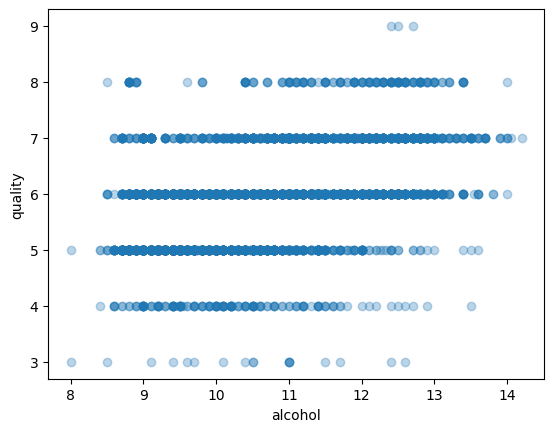

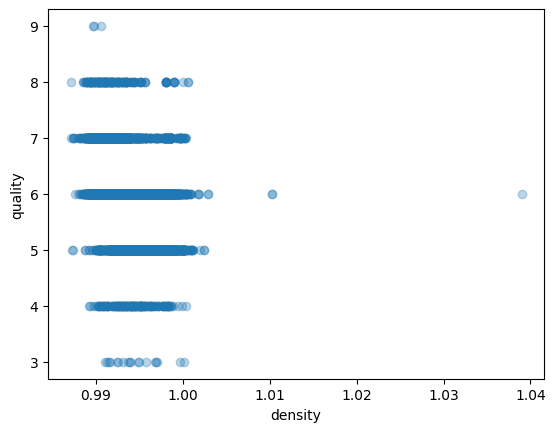

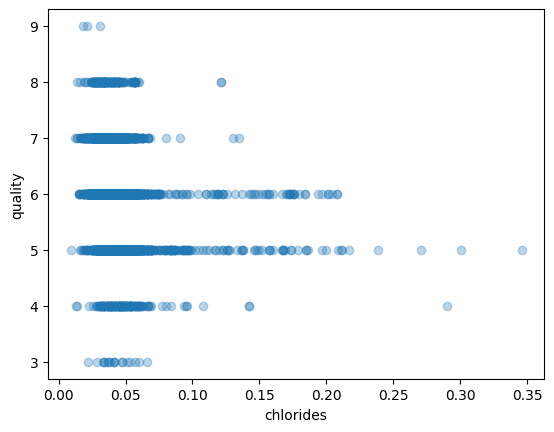

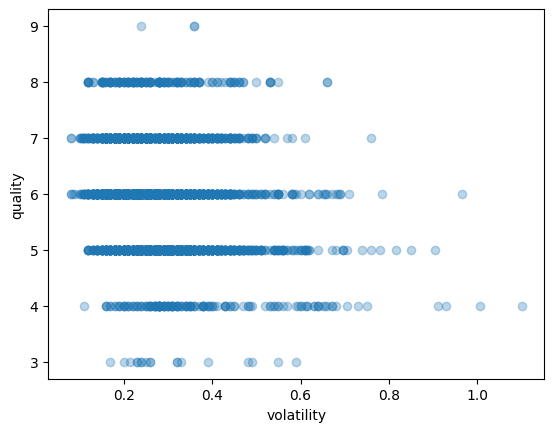

In [12]:
# Plot quality as a function of alcohol, density, chlorides and volatility
for feat in ["alcohol", "density", "chlorides", "volatility"]:
  x = wines_df[feat]
  quality_original = wines_df["quality"]

  # Plot the original quality
  plt.plot(x, quality_original, marker='o', linestyle='', alpha=0.3)
  plt.xlabel(feat)
  plt.ylabel("quality")
  plt.show()

### Regression

Use the method we used last week in the diamond dataset to create a model that predicts wine `quality` as a function of **ALL** of its other features.

Use all of our features to run regression.

In [65]:
# TODO: Create a linear model and run regression
import numpy as np
## 4. Separate the outcome variable and the independent variables
features = wines_scaled.drop(columns=["quality"])
dependent_var = wines_scaled["quality"]

## 5. Create a LinearRegression object
model = LinearRegression()

# Create a model that relates quality of wines to all other features
model.fit(features, dependent_var)

## 6. Run the model on the training data
predections_scaled = model.predict(features)

# Un-normalize the data
predections = scaler.inverse_transform(predections_scaled)

predections = np.round(predections)


## 7. Measure error
regression_error(predections, wines_df["quality"])

0.8016415831429076

### Plot Results

On average our predictions are within $0.75$ points of the real quality values.

Save the original `quality` values in a variable called `quality_original` and the `predicted quality` in another variable, called`quality_predicted`, and run the cell below to look at some plots of our predictions.

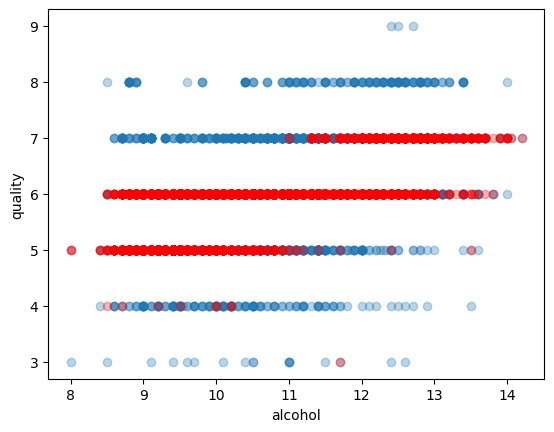

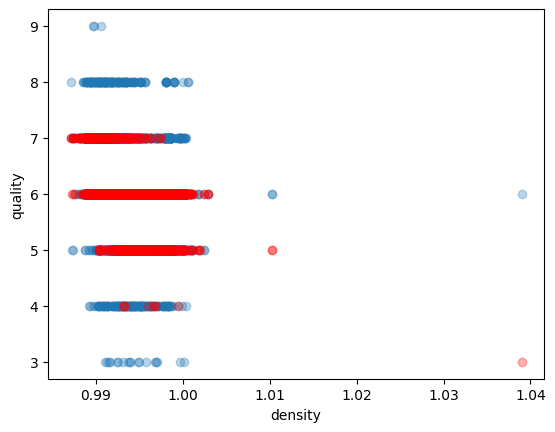

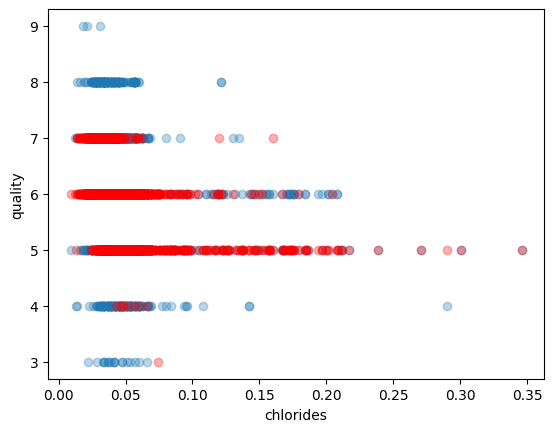

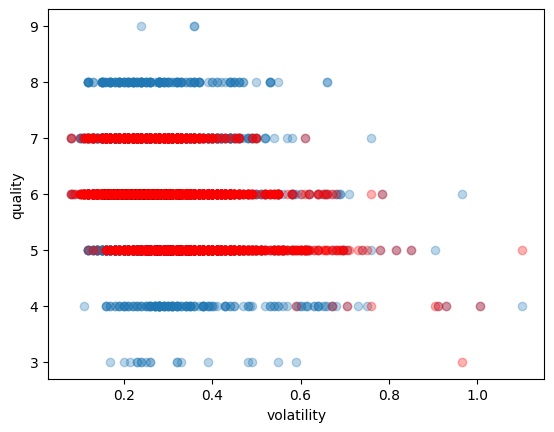

In [66]:
# Plot quality vs alcohol and volatile acidity
for feat in ["alcohol", "density", "chlorides", "volatility"]:
  x = wines_df[feat]
  quality_original = wines_df["quality"]
  quality_predicted = predections["quality"]

  # Plot the original quality
  plt.plot(x, quality_original, marker='o', linestyle='', alpha=0.3)
  plt.plot(x, quality_predicted, color='r', marker='o', linestyle='', alpha=0.3)
  plt.xlabel(feat)
  plt.ylabel("quality")
  plt.show()

### Interpretation

# 🤔

Hmm.... these could be better.

Our model wasn't able to capture the fact that the calculated `quality` value should be a discrete value and not a number with decimals.

This is because our `quality` category is not continuous, and instead can only have particular discrete values.

Instead of trying to calculate continuous values for `quality`, our model should really be trying to put the wines in the right `quality` category.

Let's use a different type of model for this task.

Instead of learning how to predict a continuous value from the independent variables, like this:

<img src="./imgs/wages-exp-fit.png" width="620px"/>

Our model should learn how to place data points into discrete groups, like this:

<img src="./imgs/wages-exp-classes.png" width="620px"/>

## Classification

This is what's called a *classification* problem, or task (sometimes also called _Logistic Regression_).

Instead of trying to model the behavior of a continuous value, like `price` or `temperature`, a classification model tries to predict the correct *label* for given input data.

The steps for training a classification model are the same:

1. Load dataset
2. Encode label features as numbers
3. Normalize the data
4. Separate the outcome variable and the feature variables
5. Create a model
6. Run model on input data and test data, and 
7. Measure error

Even though we are trying to predict labels for our data, we still have to encode all label/categorical features into numbers, whether they are input or output variables. This is because our models are always using some kind of math to compare values and make predictions, and they wouldn't really know how to do that with text or other non-numeric data.

### Random ? Forest ?

The particular classification model we will use is called a [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

The model gets its name from another type of model called a [Decision Tree](https://scikit-learn.org/stable/modules/tree.html). During training, Decision Trees learn to model our data using simple decision rules, in a process that is conceptually similar to the game [Twenty Questions](https://en.wikipedia.org/wiki/Twenty_questions).

It learns to separate our data into categories by *asking* a series of yes/no, if/else, questions using our features:

<img src="./imgs/decision-trees.jpg" width="720px"/>

A Random Forest Classifier is a model that combines a bunch of Tree models that were trained with randomly selected subsets of our features.

### Let's Model !

Steps are the same as before:

In [67]:
## 4. Separate the outcome variable and the independent variables
features_rfc = wines_scaled.drop(columns=["quality"])

outcome_rfc = wines_df["quality"]

# We're still using scaled feature variables

# But, now our quality variable will be unscaled,
# so it keeps its original values as labels 0 - 9

## 5. Create a RandomForestClassifier object
#we can fix the random state
#model = RandomForestClassifier(random_state=2)

#or not
model = RandomForestClassifier()

# Create a model that classifies quality of wines based on many features
# model.fit(features, wines_df["quality"])
model.fit(features_rfc, wines_df["quality"]) 

## 6. Run the model on the training data
predictions = model.predict(features_rfc)

## 7. Measure error
regression_error(wines_df["quality"], predictions["quality"])

0.06683662657706221

### Plot Results

Ohh, that's better. On average, the model misses the quality value by about $0.07$ points.

Let's take a look at some plots to confirm that the model captured the discrete-ness of our label:

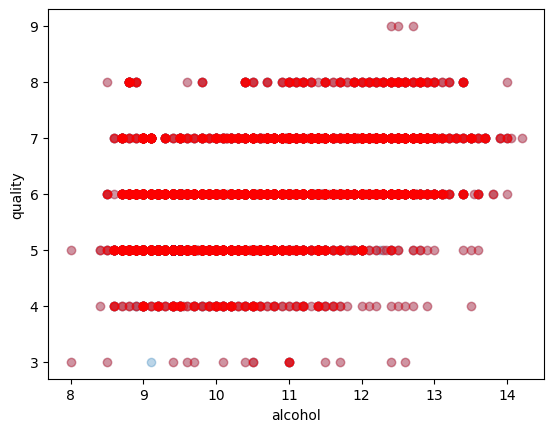

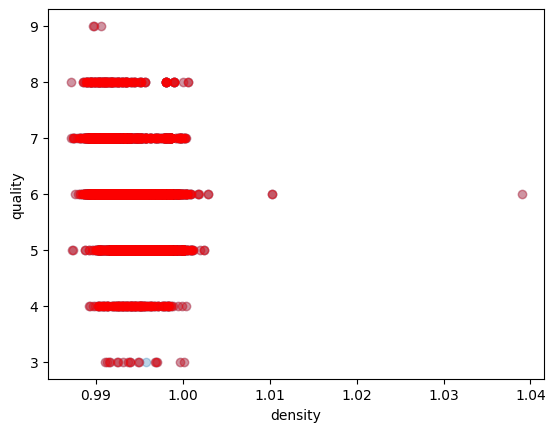

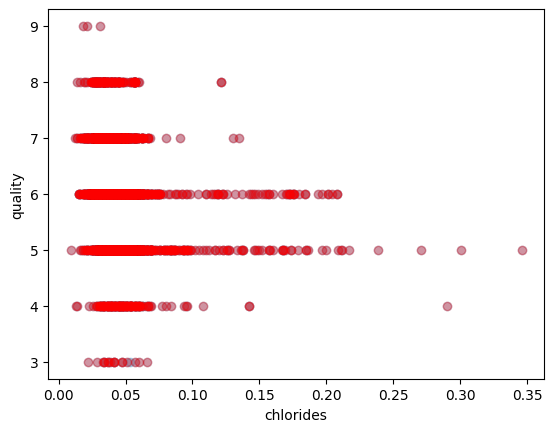

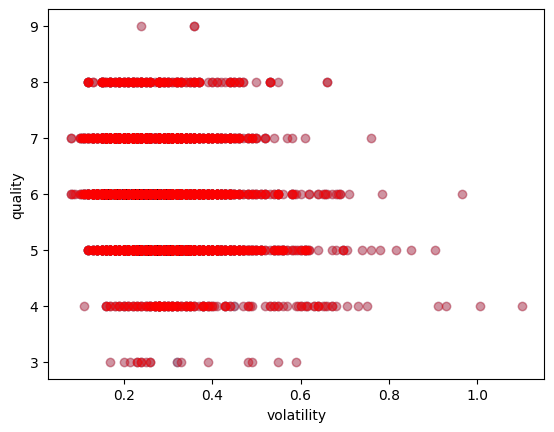

In [47]:
# Plot quality as a function of alcohol, density, chlorides and volatility
for feat in ["alcohol", "density", "chlorides", "volatility"]:
  x = wines_df[feat]
  quality_original = wines_df["quality"]
  quality_predicted = predictions["quality"]

  # Plot the original quality
  plt.plot(x, quality_original, marker='o', linestyle='', alpha=0.3)
  plt.plot(x, quality_predicted, color='r', marker='o', linestyle='', alpha=0.3)
  plt.xlabel(feat)
  plt.ylabel("quality")
  plt.show()

# 🍷🎉

Much better !

### Test Dataset

One thing that we haven't been doing, but is an important step when training any kind of ML model, is to actually test our model on data that wasn't used in the training.

When we calculate the regression/prediction error on the same dataset that we use to create the model, it tells us how well the model learned from the data. When we calculate this error on a test dataset, one that wasn't used for fitting the model, it tells us how well the model can generalize its predictions to data it hasn't seen.

The regression/prediction error is an indication of how good our model is.

Calculating it using a separate test dataset will tell us whether our model has actually learned patterns from the data or just memorized the training data.

The steps for preparing the data and running it through the model are the same, except we don't have to `fit()` a scaler, nor a model. We'll just use the scaler and model that we trained with the `train` set to `transform()`/`predict()` the `test` data.

In [68]:
## 1. Load Dataset
WINE_TEST_FILE = "https://raw.githubusercontent.com/PSAM-5020-2025S-A/5020-utils/main/datasets/json/wines-test.json"

# Read into DataFrame
wines_test_data = object_from_json_url(WINE_TEST_FILE)
wines_test_df = pd.DataFrame.from_records(wines_test_data)

## 3. Normalize
wines_test_scaled = scaler.transform(wines_test_df)

## 4. Separate the independent variables
features_test = wines_test_scaled.drop(columns=["quality"])

## 6. Run the model on the test data
predicted_test = model.predict(features_test)

## 7. Measure error
regression_error(wines_test_df["quality"], predicted_test["quality"])

0.7124704998790964

### Interpretation

This is not great. On average our model is within $0.7$ quality points of the real values.

Let's take a look at some plots:

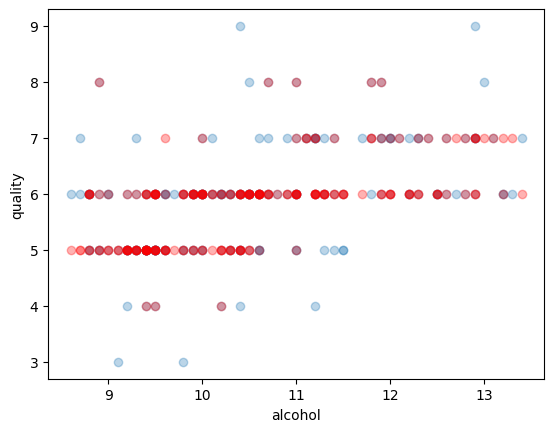

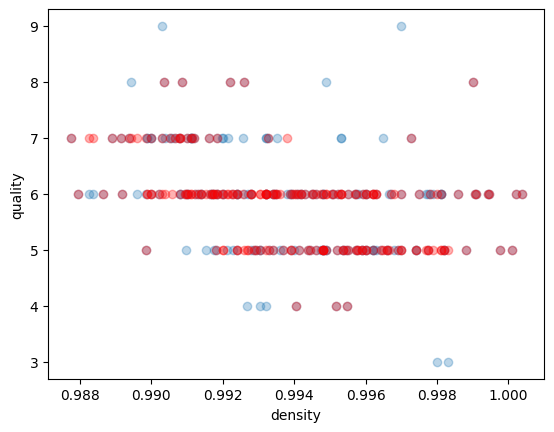

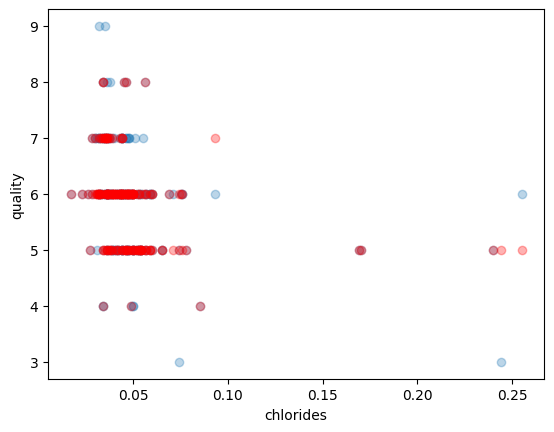

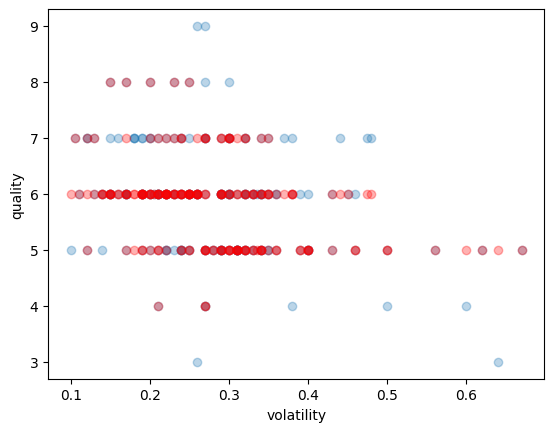

In [57]:
# Plot quality as a function of alcohol, density, chlorides and volatility
for feat in ["alcohol", "density", "chlorides", "volatility"]:
  x = wines_test_df[feat]
  quality_original = wines_test_df["quality"]
  quality_predicted = predicted_test["quality"]

  # Plot the original quality
  plt.plot(x, quality_original, marker='o', linestyle='', alpha=0.3)
  plt.plot(x, quality_predicted, color='r', marker='o', linestyle='', alpha=0.3)
  plt.xlabel(feat)
  plt.ylabel("quality")
  plt.show()

### Better Interpretation

Using the `regression_error()` function like this to measure the error of our classifier model gives us some sense of what's happening in the model, but we have better ways of analyzing the results of a classification task.

### Confusion Matrix

The **_Confusion Matrix_** graph is an example of an evaluation metric that is specifically used for measuring how well a classification model performs.

It's a very elegant way of displaying which classes our model can classify, which classes it confuses with other classes, and if there are any classes that it prefers to predict. There's actually a lot of information in that graph, that can tell us different things about our model and its potential shortcomings.

Let's look at a simpler **_Confusion Matrix_** and break down all the information that it displays:

<img src="./imgs/confusion2.jpg" height="350px" />

The above matrix for a fictitious model shows that we are interested in classifying things into two categories, with labels $0$ and $1$. Our data set contains $7$ instances of the $0$ class (sum of first row), and $10$ instances of class $1$ (sum of second row).

Our model correctly predicted $5$ of the $7$ instances of class $0$; while correctly predicting $7$ of the $10$ instances of class $1$. These are called the `True` classifications.

#### Accuracy

We can use these numbers to compute the **_Accuracy_** of our model, or, how often it gets the correct answer:

$\displaystyle Accuracy = \frac{T_0 + T_1}{Total\ Instances}$

And for our example model:

$\displaystyle Accuracy = \frac{5 + 7}{5+2+3+7} = \frac{12}{17} \approx 0.7059 = 70.6\%$

Besides the **_Accuracy_** of our model, we can also compute **_Precision_** and **_Recall_** characteristics for each of the classes in our model.

#### Precision

**_Precision_** is the proportion of our predictions that were actually correct for any given class. This number will be low if our model is biased to predict any of the classes.

$\displaystyle Precision_c = \frac{T_c}{T_c + F_c}$

$\displaystyle Precision_0 = \frac{5}{5 + 3} = 0.625 = 62.5\%$ $\hspace{5em}$
$\displaystyle Precision_1 = \frac{7}{7 + 2} \approx 0.7778 = 77.78\%$

#### Recall 

**_Recall_** is the proportion of the true data labels that were predicted correctly for each class. This number will be low if our model can't really recognize one of the classes.

$\displaystyle Recall_c = \frac{T_c}{Total_c}$

$\displaystyle Recall_0 = \frac{5}{5 + 2} \approx 0.7143 = 71.43\%$ $\hspace{5em}$
$\displaystyle Recall_1 = \frac{7}{7 + 3} = 0.7 = 70\%$

### Many Classes

The exact same calculations can be done on any confusion matrix, independent of the number of classes in our model.

Consider the following matrix for a classification model with $3$ classes:

<img src="./imgs/confusion3.jpg" height="350px" />

#### Accuracy

This is still $\frac{correct}{total}$. So, for our model above:

$\displaystyle Accuracy = \frac{5 + 7 + 6}{5+2+1+2+7+2+3+0+6} = \frac{18}{28} \approx 0.6428 = 64.3\%$

#### Precision

The proportion of our predictions that were actually correct for any given class.

$\displaystyle Precision_0 = \frac{5}{5 + 2 + 3} = 0.5 = 50\%$ $\hspace{5em}$
$\displaystyle Precision_1 = \frac{7}{7 + 2 + 0} \approx 0.7778 = 77.78\%$

$\displaystyle Precision_2 = \frac{6}{6 + 2 + 1} \approx 0.6667 = 66.67\%$

#### Recall

The proportion of the true data labels that were predicted correctly for each class.

$\displaystyle Recall_0 = \frac{5}{5 + 2 + 1} = 0.625 = 62.5\%$ $\hspace{5em}$
$\displaystyle Recall_1 = \frac{7}{7 + 2 + 2} \approx 0.6364 = 63.64\%$

$\displaystyle Recall_2 = \frac{6}{6 + 0 + 3} \approx 0.6667 = 66.67\%$

### Evaluations

Ideally we would have $100\%$ for all of these metrics, but that's rarely the case.

They become useful when we have to consider tradeoffs between having models that are too sensitive and eager to predict certain classes, which might lead to low **_precision_**, versus models that don't predict certain classes ever, which would lead to low **_recall_**.

For example, if we are working on a face recognition system that will be used to unlock people's devices, we can probably live with lower **_recall_**, as long as our **_precision_** is high. This would mean that the system wouldn't always recognize certain faces easily, making it hard for some people to unlock their devices, but, on the other hand, the high **_precision_** would mean that it would be rare for the system to unlock the device for the wrong face.

### Wine Confusion

Let's look at the confusion matrices for our wine model.

First, the training data:

In [62]:
display_labels = [q for q in range(wines_df["quality"].min(), wines_df["quality"].max()+1)]
display_labels

[3, 4, 5, 6, 7, 8, 9]

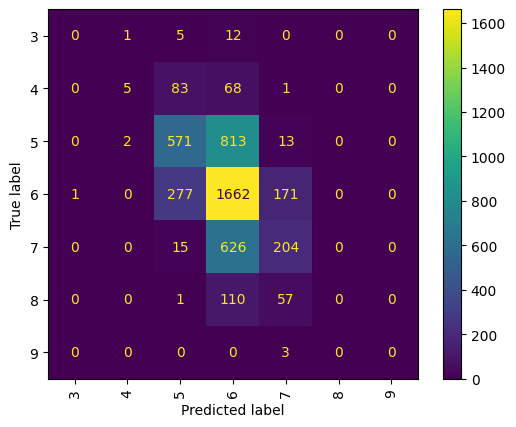

In [69]:
display_labels = [q for q in range(wines_df["quality"].min(), wines_df["quality"].max()+1)]

display_confusion_matrix(wines_df["quality"], predections["quality"], display_labels)

Now, the test data:

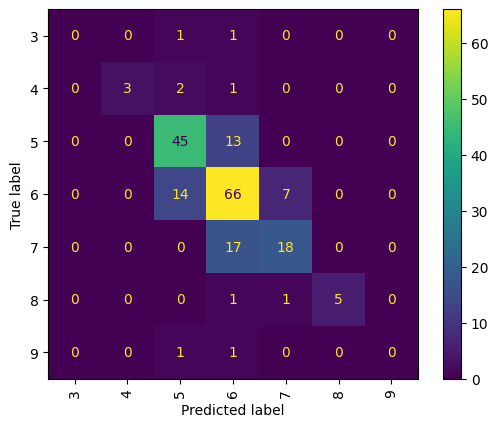

In [70]:
display_confusion_matrix(wines_test_df["quality"], predicted_test["quality"], display_labels)

### Conclusion

We have an *ok* model for predicting wine quality based on a few parameters.

The scatter plots and the confusion matrix for the test dataset show that our model doesn't perform very well for the $2$ lowest and $2$ highest quality groups. This can be because of the scarcity of data points for those groups, as it never learns to even predict $3$ or $9$.

The confusion matrix also shows that the model has a hard time with group $7$, where it predicts group $6$ about $40\%$ of the time.

### Iterate

Repeat the classification, but using one of the other modeling techniques: `SGDClassifier`, `SVC` or `LogisticRegression`.

The data is already scaled and in separate `DataFrame`s. We just have to:
- Create a Classifier object
- Run `fit()` on the training data
- Evaluate using the training and test datasets

Does it make sense to pick one over the others ? Is it easier, harder or the same to set up and pick parameters ? Are the results very different ?

In [ ]:
wines_scaled
wines_test_scaled

In [ ]:
def plot_features(feat_list, ):
    # Plot quality as a function of alcohol, density, chlorides and volatility
    for feat in ["alcohol", "density", "chlorides", "volatility"]:
        x = wines_test_df[feat]
        quality_original = wines_test_df["quality"]
        quality_predicted = predicted_test["quality"]

        # Plot the original quality
        plt.plot(x, quality_original, marker='o', linestyle='', alpha=0.3)
        plt.plot(x, quality_predicted, color='r', marker='o', linestyle='', alpha=0.3)
        plt.xlabel(feat)
        plt.ylabel("quality")
        plt.show()

0.8016415831429076

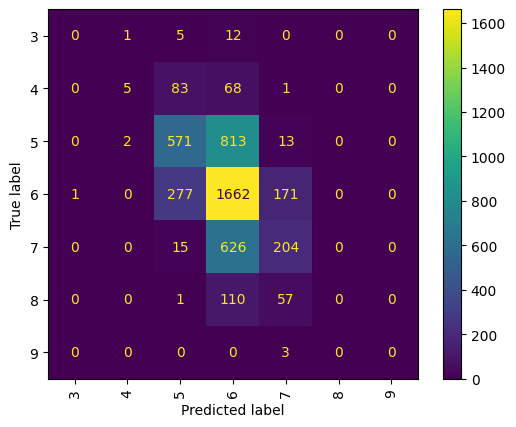

In [ ]:
# TODO: re-fit the data using a different modeling technique

## 5. Create a new Classifier object
log_model = LogisticRegression(max_iter=500)

log_model.fit(features, wines_df["quality"])
## 6. Run the model on the training data
predictions = log_model.predict(features)

## 7. Measure error
display(regression_error(wines_df["quality"], predections))

## 8. Look at Confusion Matrices
display_confusion_matrix(wines_df["quality"], predections["quality"], display_labels)

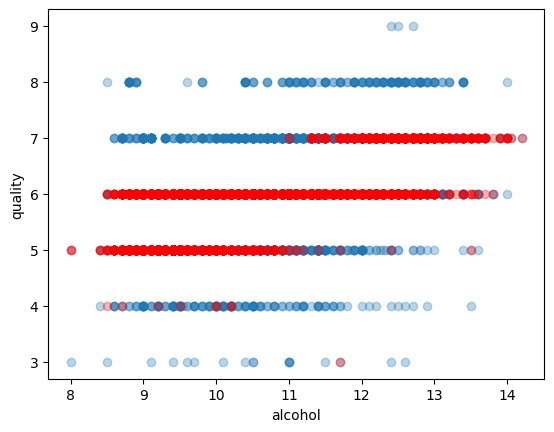

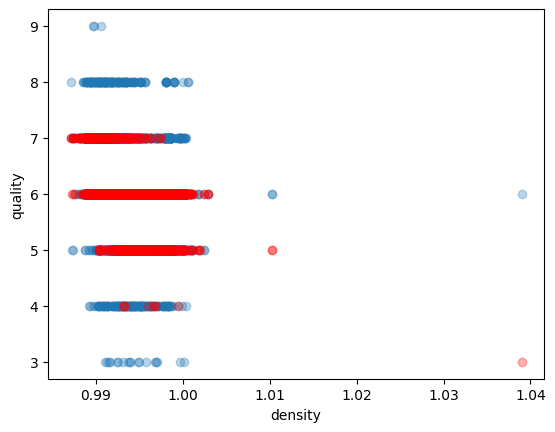

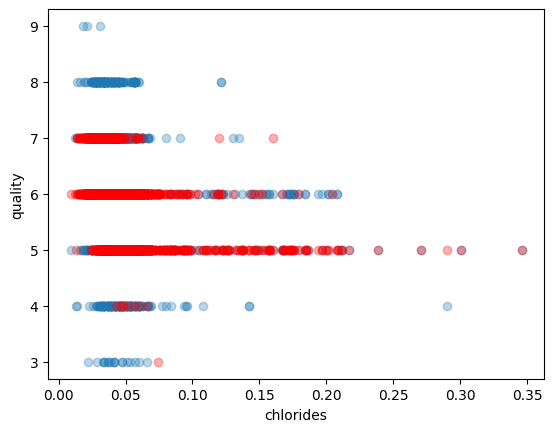

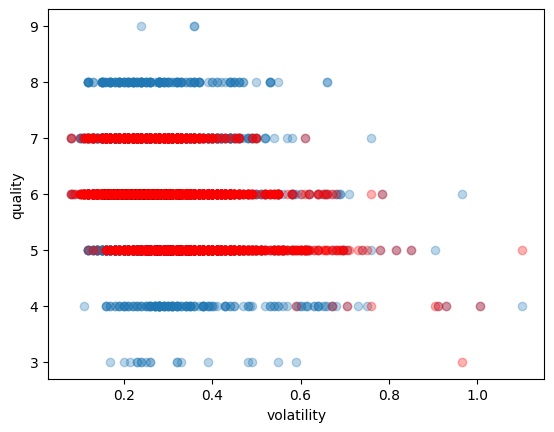

In [72]:
# Plot quality as a function of alcohol, density, chlorides and volatility
for feat in ["alcohol", "density", "chlorides", "volatility"]:
  x = wines_df[feat]
  quality_original = wines_df["quality"]
  quality_predicted = predections["quality"]

  # Plot the original quality
  plt.plot(x, quality_original, marker='o', linestyle='', alpha=0.3)
  plt.plot(x, quality_predicted, color='r', marker='o', linestyle='', alpha=0.3)
  plt.xlabel(feat)
  plt.ylabel("quality")
  plt.show()